## Dataset analysis

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
%matplotlib inline

## Leitura dataset

In [23]:
dataset = pd.read_csv('coverage-dataset.csv', sep=';')
dataset.head(5)

,Name,CountInput,CountLine,CountLineBlank,CountLineCode,CountLineCodeDecl,CountLineCodeExe,CountLineComment,CountOutput,CountPath,...,CyclomaticStrict.1,Essential.1,Knots.1,MaxEssentialKnots.1,MaxNesting.1,MinEssentialKnots.1,RatioCommentToCode.1,EdgeCoverage,PrimePathCoverage,Unnamed: 50
0,org.biojava.nbio.alignment.GuideTree.getAllPai...,2,13,0,8,3,5,5,3,2,...,1,1,0,0,0,0,0.00,"1,0000","0,8000",NaN
1,org.biojava.nbio.alignment.GuideTree.getDistan...,3,14,0,9,2,5,5,3,3,...,1,1,0,0,0,0,0.00,"1,0000","0,7143",NaN
2,org.biojava.nbio.alignment.GuideTree.getScoreM...,4,15,0,10,2,6,5,5,3,...,1,1,0,0,0,0,0.00,"1,0000","0,7000",NaN
3,org.biojava.nbio.alignment.SimpleGapPenalty.se...,2,7,0,4,1,2,3,3,1,...,2,1,1,0,1,0,0.29,"1,0000","1,0000",NaN
4,org.biojava.nbio.alignment.SimpleGapPenalty.se...,2,7,0,4,1,2,3,3,1,...,2,1,1,0,1,0,0.29,"1,0000","1,0000",NaN


In [24]:
dataset.shape[0]

4129

## Pré-processamento

In [25]:
# Remove ultima coluna vazia
dataset = dataset.iloc[:,:-1]

# Remove NaN
dataset = dataset.dropna()

# Converte valores de cobertura em float
dataset.iloc[:,-1] = dataset.iloc[:,-1].apply(lambda ppc: float(ppc.replace(',', '.')))
dataset.iloc[:,-2] = dataset.iloc[:,-2].apply(lambda ec: float(ec.replace(',', '.')))

# Remove valores de cobertura zerados
dataset = dataset[dataset['EdgeCoverage'] > 0]
dataset = dataset[dataset['PrimePathCoverage'] > 0]

dataset.head(5)

,Name,CountInput,CountLine,CountLineBlank,CountLineCode,CountLineCodeDecl,CountLineCodeExe,CountLineComment,CountOutput,CountPath,...,CyclomaticModified.1,CyclomaticStrict.1,Essential.1,Knots.1,MaxEssentialKnots.1,MaxNesting.1,MinEssentialKnots.1,RatioCommentToCode.1,EdgeCoverage,PrimePathCoverage
0,org.biojava.nbio.alignment.GuideTree.getAllPai...,2,13,0,8,3,5,5,3,2,...,1,1,1,0,0,0,0,0.00,1.0,0.8000
1,org.biojava.nbio.alignment.GuideTree.getDistan...,3,14,0,9,2,5,5,3,3,...,1,1,1,0,0,0,0,0.00,1.0,0.7143
2,org.biojava.nbio.alignment.GuideTree.getScoreM...,4,15,0,10,2,6,5,5,3,...,1,1,1,0,0,0,0,0.00,1.0,0.7000
3,org.biojava.nbio.alignment.SimpleGapPenalty.se...,2,7,0,4,1,2,3,3,1,...,2,2,1,1,0,1,0,0.29,1.0,1.0000
4,org.biojava.nbio.alignment.SimpleGapPenalty.se...,2,7,0,4,1,2,3,3,1,...,2,2,1,1,0,1,0,0.29,1.0,1.0000


## Características

<AxesSubplot:xlabel='Project', ylabel='count'>

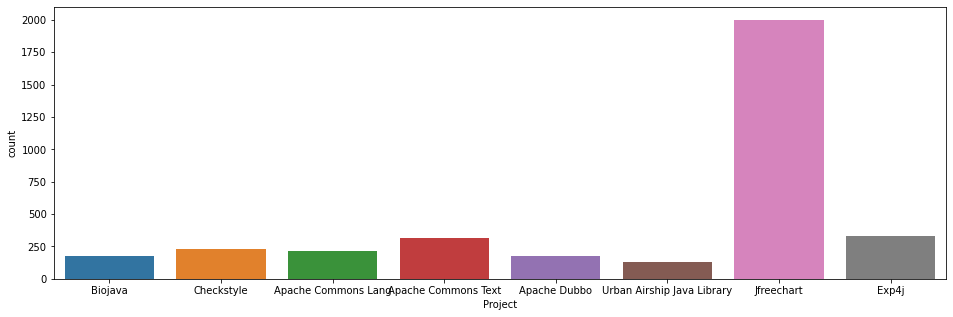

In [26]:
def signature_to_project(signature):
    project = ''
    
    if 'com.puppycrawl.tools.checkstyle' in signature:
        project = 'Checkstyle'
    elif 'exp4j' in signature:
        project = 'Exp4j'
    elif 'biojava' in signature:
        project = 'Biojava'
    elif 'org.jfree' in signature:
        project = 'Jfreechart'
    elif 'com.urbanairship' in signature:
        project = 'Urban Airship Java Library'
    elif 'org.apache.commons.text' in signature:
        project = 'Apache Commons Text'
    elif 'dubbo' in signature:
        project = 'Apache Dubbo'
    elif 'org.apache.commons.lang3' in signature:
        project = 'Apache Commons Lang'
        
    return project

d2 = dataset
d2['Project'] = dataset['Name'].apply(signature_to_project)
plt.figure(figsize=(16,5))
#sns.histplot(d2['Project'])

contrib_projetos = d2.groupby('Project')
contrib_projetos = contrib_projetos.count()

sns.countplot(x='Project', data=d2)

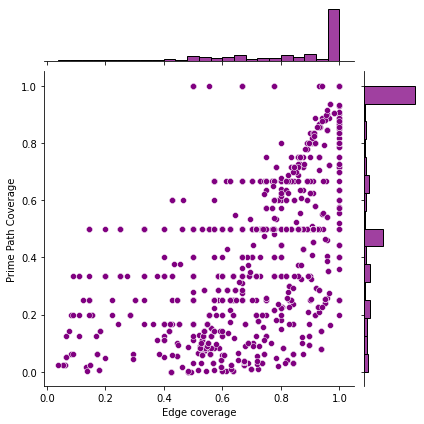

In [27]:
ax = sns.jointplot(x='EdgeCoverage', y='PrimePathCoverage', data=dataset, kind='scatter', color='purple')
#plt.xlabel('Edge coverage')
ax.set_axis_labels('Edge coverage', 'Prime Path Coverage')
plt.show(ax)

<AxesSubplot:>

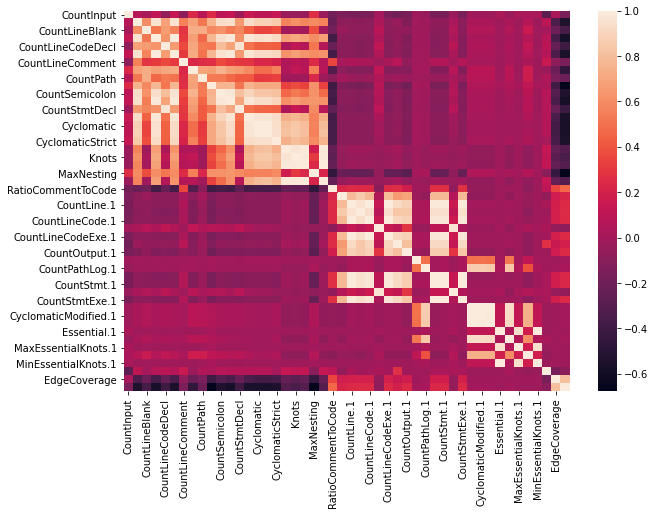

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr())

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3572 entries, 0 to 4128
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  3572 non-null   object 
 1   CountInput            3572 non-null   int64  
 2   CountLine             3572 non-null   int64  
 3   CountLineBlank        3572 non-null   int64  
 4   CountLineCode         3572 non-null   int64  
 5   CountLineCodeDecl     3572 non-null   int64  
 6   CountLineCodeExe      3572 non-null   int64  
 7   CountLineComment      3572 non-null   int64  
 8   CountOutput           3572 non-null   int64  
 9   CountPath             3572 non-null   int64  
 10  CountPathLog          3572 non-null   int64  
 11  CountSemicolon        3572 non-null   int64  
 12  CountStmt             3572 non-null   int64  
 13  CountStmtDecl         3572 non-null   int64  
 14  CountStmtExe          3572 non-null   int64  
 15  Cyclomatic           

In [30]:
dataset.describe()

,CountInput,CountLine,CountLineBlank,CountLineCode,CountLineCodeDecl,CountLineCodeExe,CountLineComment,CountOutput,CountPath,CountPathLog,...,CyclomaticModified.1,CyclomaticStrict.1,Essential.1,Knots.1,MaxEssentialKnots.1,MaxNesting.1,MinEssentialKnots.1,RatioCommentToCode.1,EdgeCoverage,PrimePathCoverage
count,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,...,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000
mean,21.975084,22.000000,0.507839,13.916853,2.518757,9.322788,7.599104,5.198768,67.620661,0.416013,...,1.198488,1.202128,1.002800,0.170493,0.001680,0.134099,0.001400,0.168449,0.843668,0.697897
std,39.699074,19.364505,1.756117,15.946953,3.300999,11.974079,5.454579,5.035157,630.116478,0.661330,...,0.721373,0.734032,0.074785,0.682864,0.047302,0.376712,0.037393,0.177228,0.206540,0.330755
min,1.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038500,0.000900
25%,4.000000,12.000000,0.000000,5.000000,1.000000,3.000000,6.000000,2.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.686675,0.500000
50%,8.000000,17.000000,0.000000,9.000000,2.000000,6.000000,7.000000,4.000000,2.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.160000,1.000000,0.833300
75%,20.000000,24.000000,0.000000,16.000000,2.000000,11.000000,9.000000,7.000000,5.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.290000,1.000000,1.000000
max,201.000000,193.000000,17.000000,171.000000,41.000000,120.000000,98.000000,58.000000,6912.000000,4.000000,...,11.000000,11.000000,3.000000,10.000000,2.000000,3.000000,1.000000,2.250000,1.000000,1.000000


In [31]:
dataset['Cyclomatic'].mean()

3.446528555431131